# Лабораторна робота №2
## Використання Pandas для аналізу даних
<br /><br/>
### Виконав
### студентка групи КН-221а
### Єфіменко Анастасія Миколаївна
### Перевірив
### асистент кафедри
### Звєрцев Герман Олександрович
<br /><br/><br/><br/>
## Мета роботи 
**Вивчення основних функцій Pandas для аналізу даних.**

In [1]:
n = 5
N = (n + 4) % 5 + 1
print(N)

5


## Хід роботи

In [2]:
import pandas as pd

file_path = 'NationalNames.csv'

data = pd.read_csv(file_path)

### 2. Вивести останні 8 рядків набору даних.

In [3]:
data.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


### 4. Отримайте загальну інформацію про дані у наборі даних.

In [4]:
data.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


### 6. Обчисліть кількість унікальних жіночих та чоловічих імен у цілому наборі даних.

In [5]:
unique_female_names = data[data['Gender'] == 'F']['Name'].nunique()
unique_male_names = data[data['Gender'] == 'M']['Name'].nunique()

print(f"\nКількість унікальних жіночих імен: {unique_female_names}")
print(f"Кількість унікальних чоловічих імен: {unique_male_names}")


Кількість унікальних жіночих імен: 64911
Кількість унікальних чоловічих імен: 39199


### 7. Знайдіть 5 найпопулярніших чоловічих імен у 2010 році.

In [6]:
top_male_names_2010 = data[(data['Gender'] == 'M') & (data['Year'] == 2010)]
top_male_names_2010.head(5)

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


### 9. Підрахуйте кількість записів, для яких Count - мінімальне у наборі.

In [7]:
min_count_records = data[data['Count'] == data['Count'].min()]
print(len(min_count_records))

254615


### 10. Підрахуйте кількість унікальних імен у кожному році.

In [8]:
unique_names_per_year = data.groupby('Year')['Name'].nunique().reset_index(name='Name')
unique_names_per_year

,Year,Name
0,1880,1889
1,1881,1830
2,1882,2012
3,1883,1962
4,1884,2158
...,...,...
130,2010,31603
131,2011,31418
132,2012,31236
133,2013,30774


### 15. Знайдіть загальну кількість народжень за рік.

In [9]:
total_births_per_year = data.groupby('Year')['Count'].sum().reset_index(name='Births')
total_births_per_year

,Year,Births
0,1880,201484
1,1881,192699
2,1882,221538
3,1883,216950
4,1884,243467
...,...,...
130,2010,3686589
131,2011,3646730
132,2012,3643336
133,2013,3626802


### 16. Знайдіть рік, коли народилося найбільше дітей.

In [10]:
year_with_most_births = data.groupby('Year')['Count'].sum().idxmax()
print(year_with_most_births)

1957


### 17. Знайдіть кількість дівчаток та хлопчиків, які народились кожного року.

In [11]:
gender_counts_per_year = data.groupby(['Year', 'Gender'])['Count'].sum().unstack()
gender_counts_per_year

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414


### 18. Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків.

In [12]:
years_more_girls_than_boys = (gender_counts_per_year['F'] > gender_counts_per_year['M']).sum()
print(years_more_girls_than_boys)

54


### 20. Підрахуйте кількість гендерно нейтральних імен (однакових для дівчат та хлопців).

In [13]:
gender_neutral_names_count = data.groupby('Name')['Gender'].nunique().eq(2).sum()
print(gender_neutral_names_count)

10221


### 21. Порахуйте, скільки разів хлопчиків називали Barbara.

In [14]:
barbara_male_count = data[(data['Name'] == 'Barbara') & (data['Gender'] == 'M')]['Count'].sum()
print(barbara_male_count)

4139


### 22. Підрахуйте скільки років проводилось спостереження

In [15]:
observation_years = data['Year'].nunique()
print(f"\nСпостереження проводилось {observation_years} років")


Спостереження проводилось 135 років


### 23. Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року)

In [16]:
neutral_names_counts = pd.DataFrame(data[['Name']].value_counts().reset_index())
top_neutral_names = neutral_names_counts[neutral_names_counts['count'] == observation_years * 2][['Name']]
top_neutral_names

,Name
0,James
1,Leslie
2,Joseph
3,Jessie
4,Jesse
5,Sidney
6,John
7,Robert
8,Tommie
9,Jean


### 24. Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я, яким називали дітей найбільшу кількість разів)

In [17]:
unpopular_names = data[data['Count'] <= 100]
most_popular_unpopular_name = unpopular_names.sort_values(by='Count', ascending=False).head(1)
print(f"Найпопулярніше серед непопулярних імен: {most_popular_unpopular_name['Name'].values[0]}. Ним називали {most_popular_unpopular_name['Count'].values[0]} разів")

Найпопулярніше серед непопулярних імен: Kris. Ним називали 100 разів


In [18]:
import matplotlib.pyplot as plt

### 25. Побудувати графіки розподілення кількості імен John та Mary по роках без залежності до статі.

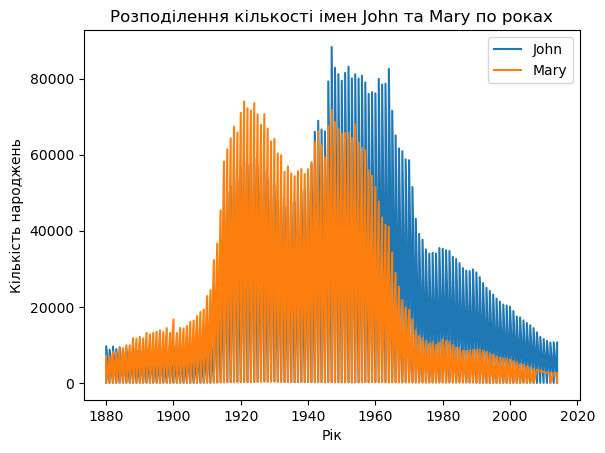

In [19]:
names_to_plot = ['John', 'Mary']
names_data = data[data['Name'].isin(names_to_plot)]

for name in names_to_plot:
    name_data = names_data[names_data['Name'] == name]
    plt.plot(name_data['Year'].values, name_data['Count'].values, label=name)

plt.title('Розподілення кількості імен John та Mary по роках')
plt.xlabel('Рік')
plt.ylabel('Кількість народжень')
plt.legend()
plt.show()

### 26. Побудувати графіки розподілення кількості жіночих імен John та чоловічих імен Mary по роках.

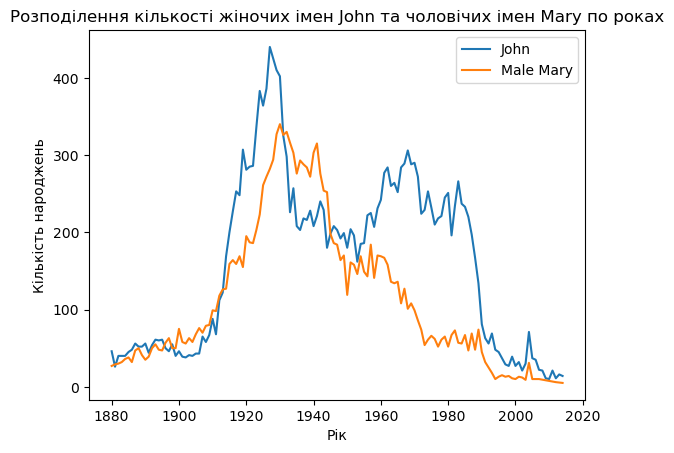

In [20]:
female_names_data = data[data['Gender'] == 'F']
female_names_to_plot = ['John']
male_names_data = data[data['Gender'] == 'M']
male_names_to_plot = ['Mary']

for name in female_names_to_plot:
    name_data = female_names_data[female_names_data['Name'] == name]
    plt.plot(name_data['Year'].values, name_data['Count'].values, label=f'{name}')

for name in male_names_to_plot:
    name_data = male_names_data[male_names_data['Name'] == name]
    plt.plot(name_data['Year'].values, name_data['Count'].values, label=f'Male {name}')

plt.title('Розподілення кількості жіночих імен John та чоловічих імен Mary по роках')
plt.xlabel('Рік')
plt.ylabel('Кількість народжень')
plt.legend()
plt.show()

### 27. Знайти найпопулярніші імена в кожному році.

In [21]:
most_popular_names_per_year = data.loc[data.groupby('Year')['Count'].idxmax()][['Year', 'Name', 'Count']]
most_popular_names_per_year = most_popular_names_per_year.set_index('Year')
most_popular_names_per_year

,Name,Count
Year,,
1880,John,9655
1881,John,8769
1882,John,9557
1883,John,8894
1884,John,9388
...,...,...
2010,Isabella,22883
2011,Sophia,21816
2012,Sophia,22267


## <a href="https://github.com/dashboard">Посилання</a> на створений блокнот Jupyter на GitHub

## Висновки
**Під час виконання лабораторної роботи №2 було розлянуто бібліотеку мови Python Pandas та особливості її використання. 
Десятки виконаних завдань з цієї теми допомогли осягнути базові можливості цієї бібліотеки та отримати цінні знання.
До того ж, було здобуто більше досвіду в Jupyter Notebook та вдосконалено навички роботи з блокнотом.
Врешті-решт, пророблені в рамках лабораторної роботи №2 завдання будуть корисними для більш поглибленого програмування на Python.**